In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-mental-health/Student Mental health.csv


<h1 style="color: blue; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px; font-family:cursive; font-size: 36px;">Student mental health (EDA) </h1>

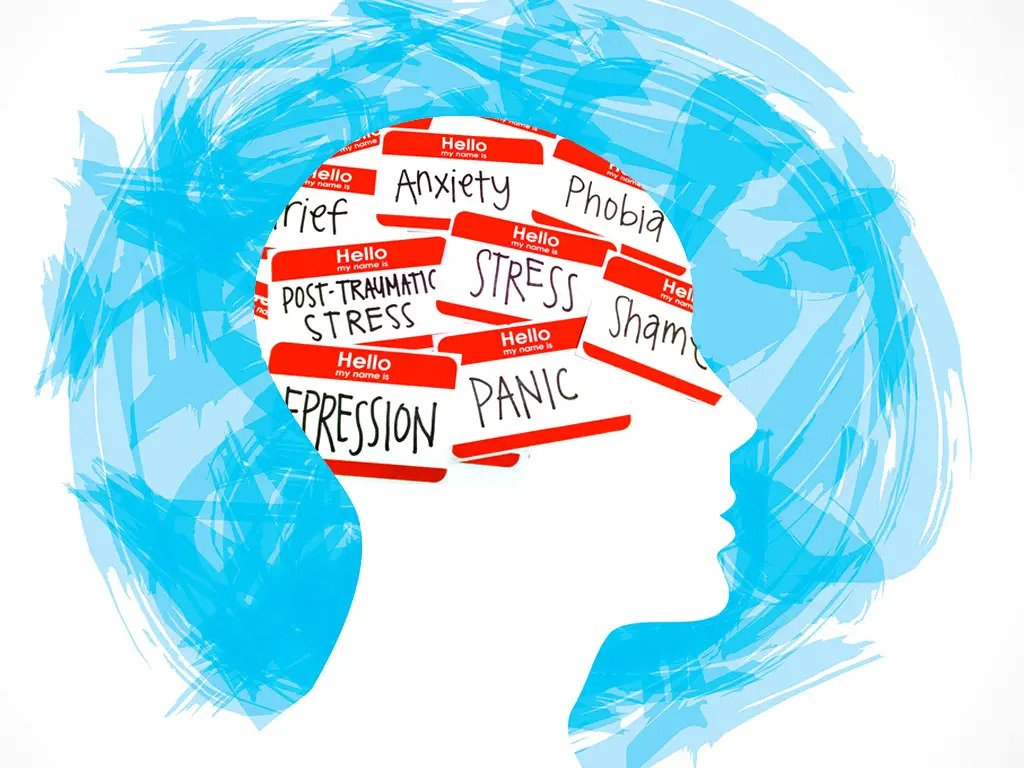

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=50
sns.set(style="darkgrid",rc={"axes.facecolor":"#CAF1DE"})

In [3]:
df=pd.read_csv("/kaggle/input/student-mental-health/Student Mental health.csv")
df

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


## Workflow
- Understanding of data
- Data cleaning
- Exploratory Data Analysis
- Insights

<h1 style="text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;">Understanding the data </h1>

In [4]:
#checking shape
df.shape

(101, 11)

> ## There are 101 rows and 11 columns

In [5]:
# checking column names
df.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [6]:
# checkig basic info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [7]:
# checking null values
df.isnull().sum().sort_values(ascending=False)

Age                                             1
Timestamp                                       0
Choose your gender                              0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

> ## Only one null values which is in Age columns

In [8]:
df.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

> ## Timestamp is in object we have to change it to datetime, Age can be in int

In [9]:
# Checking null values in percentage
for i in df.columns:
    if df[i].isnull().any():
        print(i,"--------",df[i].isnull().sum()*100/df.shape[0],"%")

Age -------- 0.9900990099009901 %


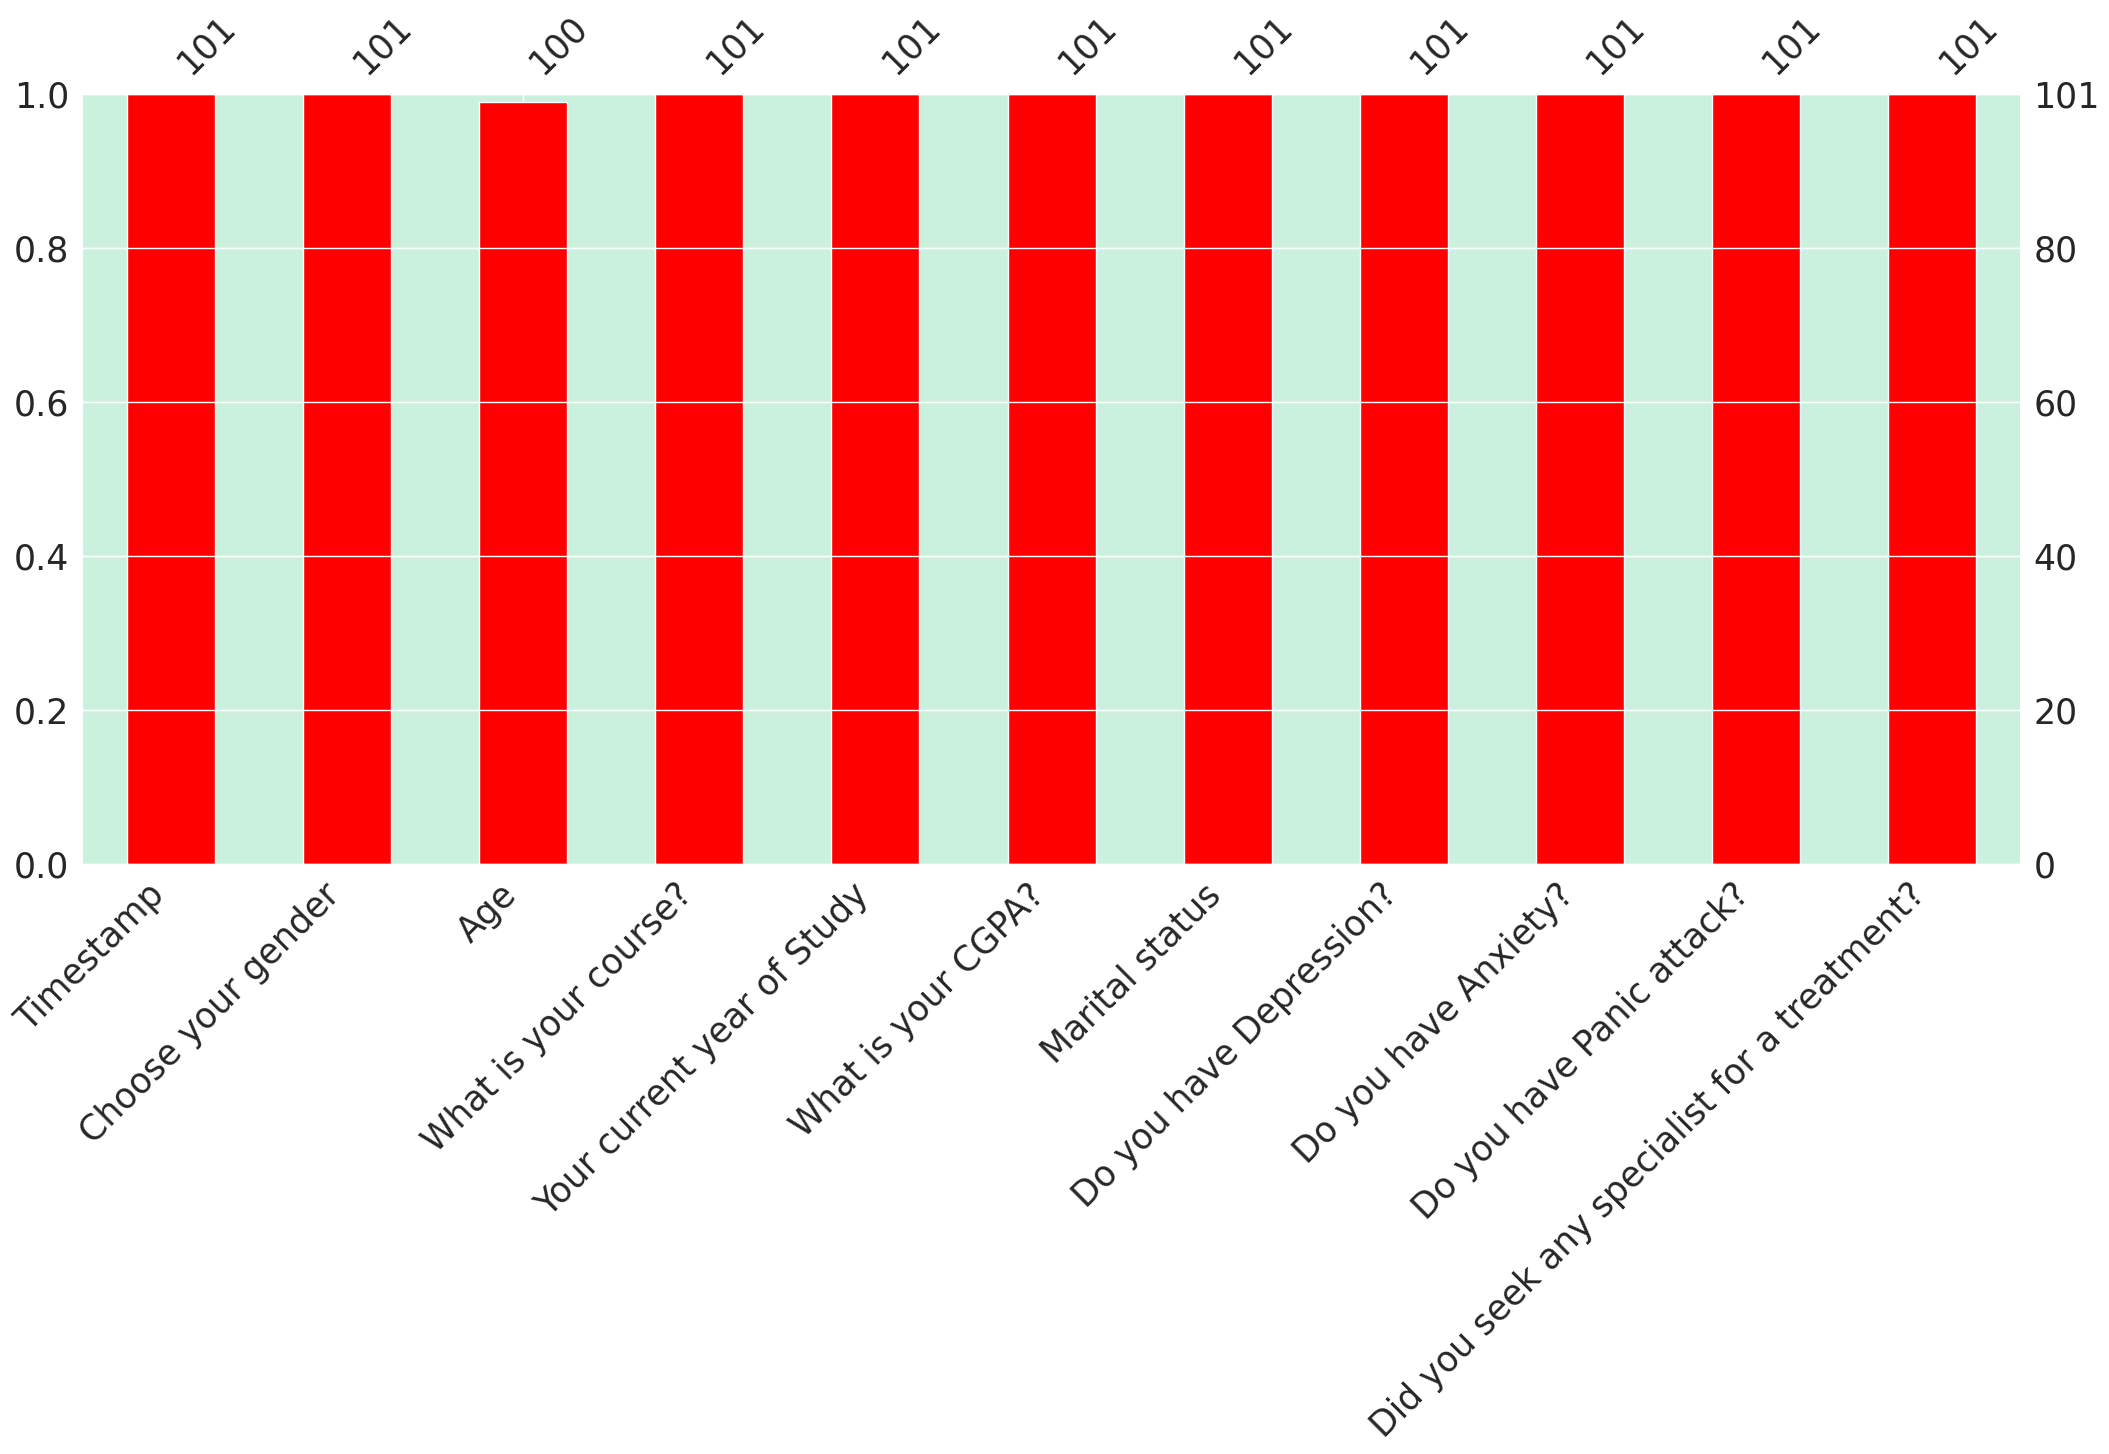

In [10]:
#Checking null values in figure
import missingno as msno
msno.bar(df,color="red",fontsize=25);

> ## Hence we can see only one missing values which is in Age

In [11]:
# Checking duplicates
df.duplicated().sum()

0

> ## No duplicates are there

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100.0,20.53,2.49628,18.0,18.0,19.0,23.0,24.0


In [13]:
df.describe(include="object").T

,count,unique,top,freq
Timestamp,101,92,8/7/2020 12:39,3
Choose your gender,101,2,Female,75
What is your course?,101,49,BCS,18
Your current year of Study,101,7,year 1,41
What is your CGPA?,101,6,3.50 - 4.00,47
Marital status,101,2,No,85
Do you have Depression?,101,2,No,66
Do you have Anxiety?,101,2,No,67
Do you have Panic attack?,101,2,No,68
Did you seek any specialist for a treatment?,101,2,No,95


In [14]:
#Checking unique values
for i in df.columns:
    print(i,"-------",df[i].unique(),"--------",df[i].nunique())

Timestamp ------- ['8/7/2020 12:02' '8/7/2020 12:04' '8/7/2020 12:05' '8/7/2020 12:06'
 '8/7/2020 12:13' '8/7/2020 12:31' '8/7/2020 12:32' '8/7/2020 12:33'
 '8/7/2020 12:35' '8/7/2020 12:39' '8/7/2020 12:40' '8/7/2020 12:41'
 '8/7/2020 12:43' '8/7/2020 12:46' '8/7/2020 12:52' '8/7/2020 13:05'
 '8/7/2020 13:07' '8/7/2020 13:12' '8/7/2020 13:13' '8/7/2020 13:15'
 '8/7/2020 13:17' '8/7/2020 13:29' '8/7/2020 13:35' '8/7/2020 13:41'
 '8/7/2020 13:58' '8/7/2020 14:05' '8/7/2020 14:27' '8/7/2020 14:29'
 '8/7/2020 14:31' '8/7/2020 14:41' '8/7/2020 14:43' '8/7/2020 14:45'
 '8/7/2020 14:47' '8/7/2020 14:56' '8/7/2020 14:57' '8/7/2020 14:58'
 '8/7/2020 15:07' '8/7/2020 15:08' '8/7/2020 15:09' '8/7/2020 15:12'
 '8/7/2020 15:14' '8/7/2020 15:18' '8/7/2020 15:27' '8/7/2020 15:37'
 '8/7/2020 15:47' '8/7/2020 15:48' '8/7/2020 15:57' '8/7/2020 15:58'
 '8/7/2020 16:08' '8/7/2020 16:21' '8/7/2020 16:22' '8/7/2020 16:34'
 '8/7/2020 16:53' '8/7/2020 17:05' '8/7/2020 17:37' '8/7/2020 17:46'
 '8/7/2020 17:50

<h1 style="text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;">Data Cleaning</h1>

In [15]:
df.sample()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
65,8/7/2020 17:50,Female,23.0,Econs,year 1,3.50 - 4.00,No,Yes,Yes,No,No


In [16]:
#changing object to datetime and fetching month,day,hour
import datetime as dt
df["Timestamp"]=pd.to_datetime(df["Timestamp"])
df["month"]=df["Timestamp"].dt.month_name()
df["day"]=df["Timestamp"].dt.day_name()
df["year"]=df["Timestamp"].dt.year
df["hour"]=df["Timestamp"].dt.hour
df.sample()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,month,day,year,hour
90,2020-07-13 13:57:11,Female,23.0,DIPLOMA TESL,Year 3,3.50 - 4.00,No,No,No,Yes,No,July,Monday,2020,13


> ## Changed Data type of Timestamp to **datetime64**, and **created month name, day name and hour column through feature engineering**

In [17]:
#Filling age with mean 
df["Age"].fillna(df["Age"].median(),inplace=True)

In [18]:
df["Age"]=df["Age"].astype("int")

In [19]:
df.dtypes

Timestamp                                       datetime64[ns]
Choose your gender                                      object
Age                                                      int64
What is your course?                                    object
Your current year of Study                              object
What is your CGPA?                                      object
Marital status                                          object
Do you have Depression?                                 object
Do you have Anxiety?                                    object
Do you have Panic attack?                               object
Did you seek any specialist for a treatment?            object
month                                                   object
day                                                     object
year                                                     int64
hour                                                     int64
dtype: object

> ## Filled null values of **Age column with median** and changes its **data type to Interger**

<h1 style="text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;">Exploratory Data Analysis with Insights </h1>


In [20]:
df.sample()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,month,day,year,hour
18,2020-08-07 13:05:00,Female,20,BIT,Year 2,3.50 - 4.00,No,No,Yes,No,No,August,Friday,2020,13


Female    75
Male      26
Name: Choose your gender, dtype: int64


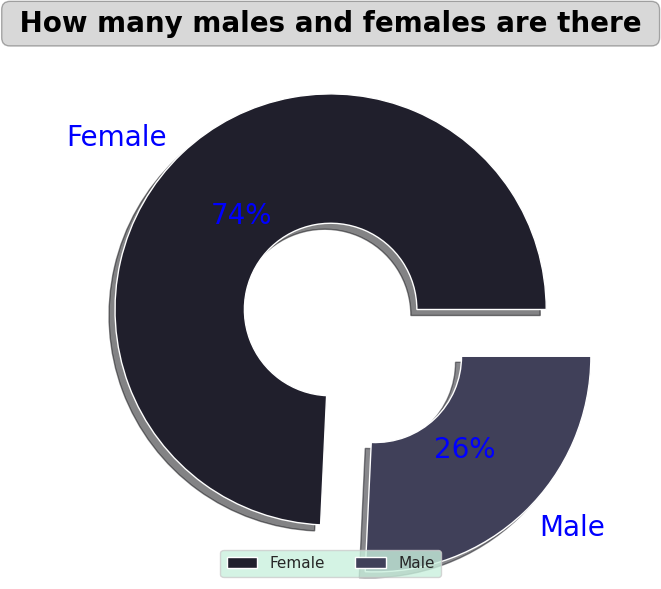

In [41]:
# How many males and females are there 
x=df["Choose your gender"].value_counts().sort_values(ascending=False)
print(x)
plt.figure(figsize=(7,7))
color=sns.color_palette("bone")
plt.pie(x,labels=x.index,autopct="%0.0f%%",textprops={'color': 'blue',"fontsize":20},wedgeprops={"width":0.6},shadow=True,colors=color,explode=[0,0.3])
plt.legend(loc="lower center",bbox_to_anchor=(0.5,-0.01),ncol=4)
plt.title(' How many males and females are there ', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict(boxstyle='round', facecolor='grey', alpha=0.30,edgecolor='black'));

> ## ➡️ There are **75 Females** which is 74%

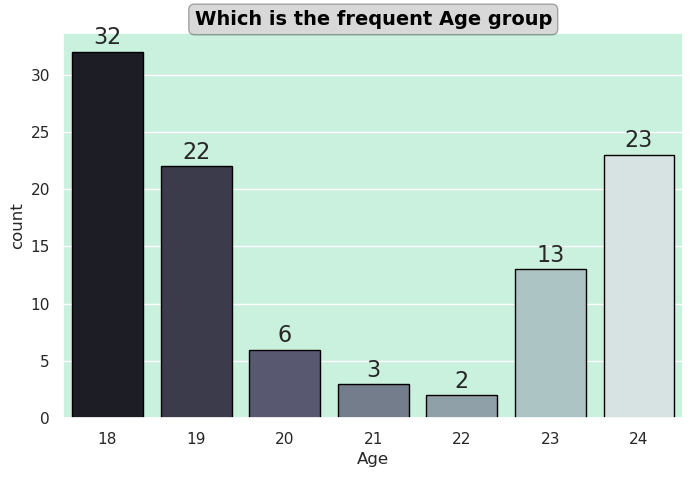

In [22]:
# Which is the frequent Age group 
plt.figure(figsize=(8,5))
ax=sns.countplot(x="Age",edgecolor="black",data=df,palette="bone")
plt.title('Which is the frequent Age group', fontdict={'fontsize': 14, 'color': 'black', 'fontweight': 'bold'}, bbox=dict(boxstyle='round', facecolor='grey', alpha=0.30,edgecolor='black'));

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=16,
                xytext = (0, 10),
                textcoords = 'offset points')

> ## ➡️ The Age of **18,19 and 24** were most 

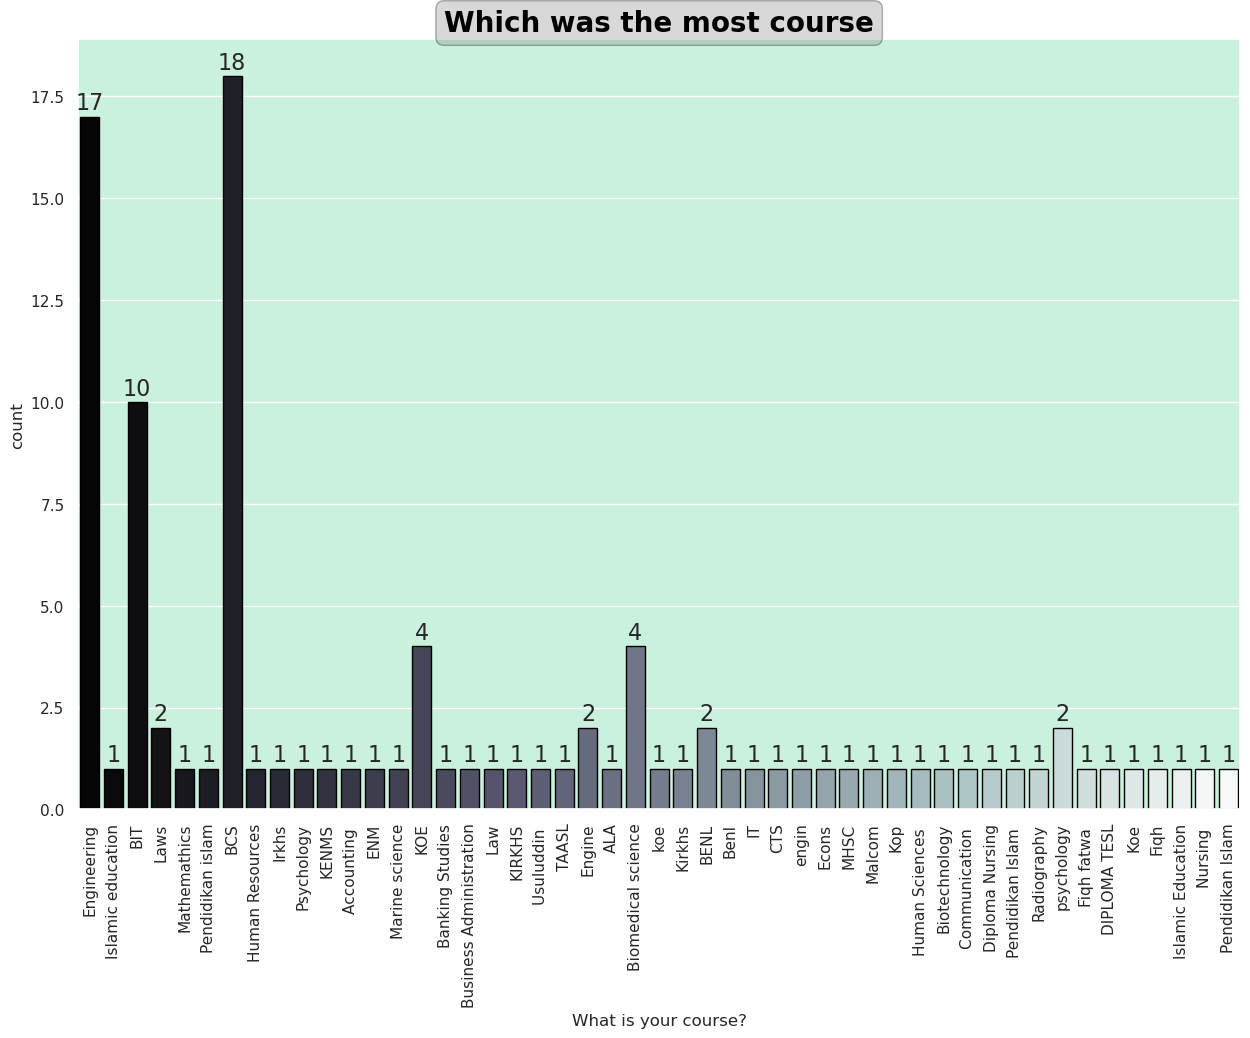

In [23]:
# Which was the most course
plt.figure(figsize=(15,10))
ax=sns.countplot(x="What is your course?",edgecolor="black",data=df,palette="bone")
plt.title('Which was the most course', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict(boxstyle='round', facecolor='grey', alpha=0.30,edgecolor='black'));
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=16,
                xytext = (0, 10),
                textcoords = 'offset points')

> ## ➡️ **BCS & Engineering** was the most cources

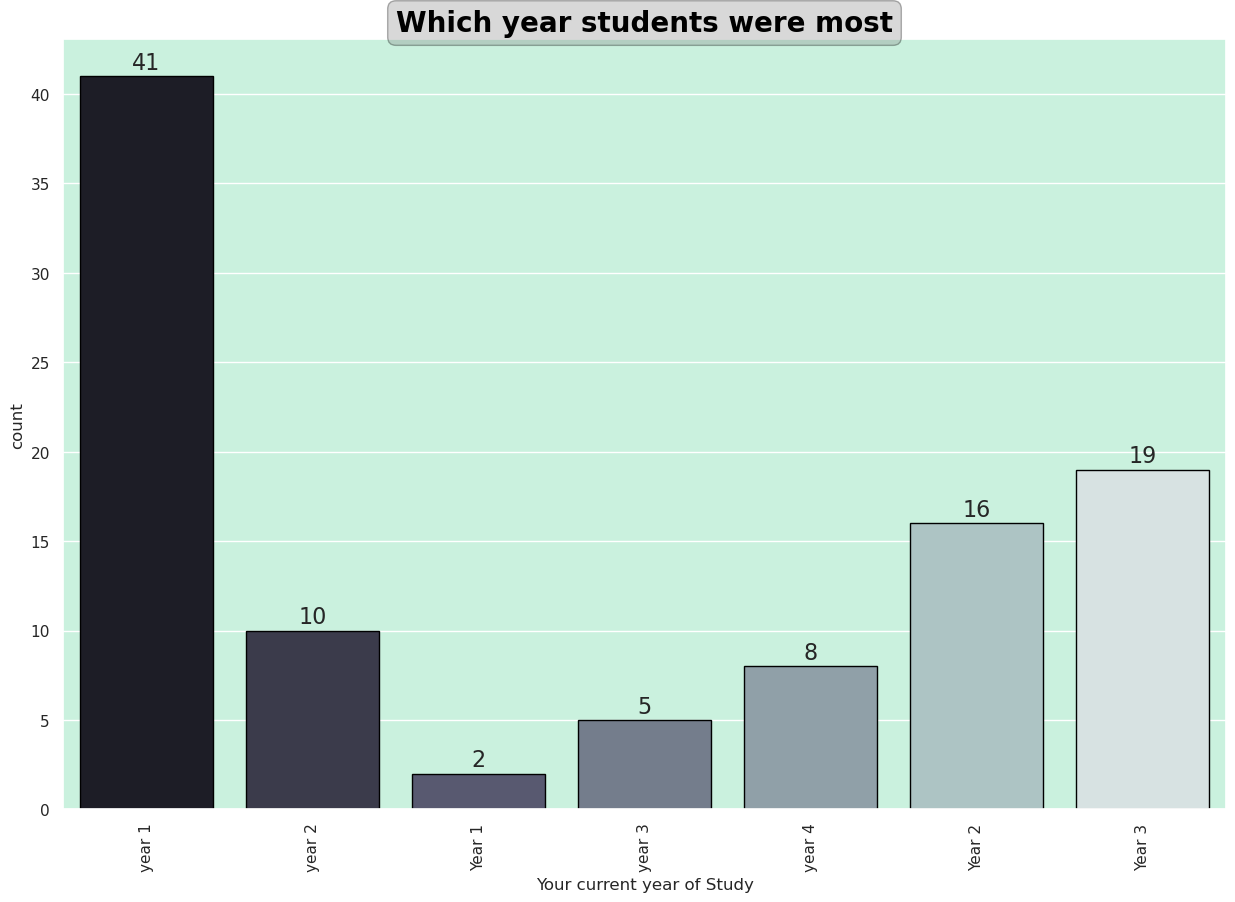

In [24]:
# WHich year students were most
plt.figure(figsize=(15,10))
ax=sns.countplot(x="Your current year of Study",edgecolor="black",data=df,palette="bone")
plt.title('Which year students were most', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict(boxstyle='round', facecolor='grey', alpha=0.30,edgecolor='black'));
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=16,
                xytext = (0, 10),
                textcoords = 'offset points')

> ## ➡️ **1st year** students were most

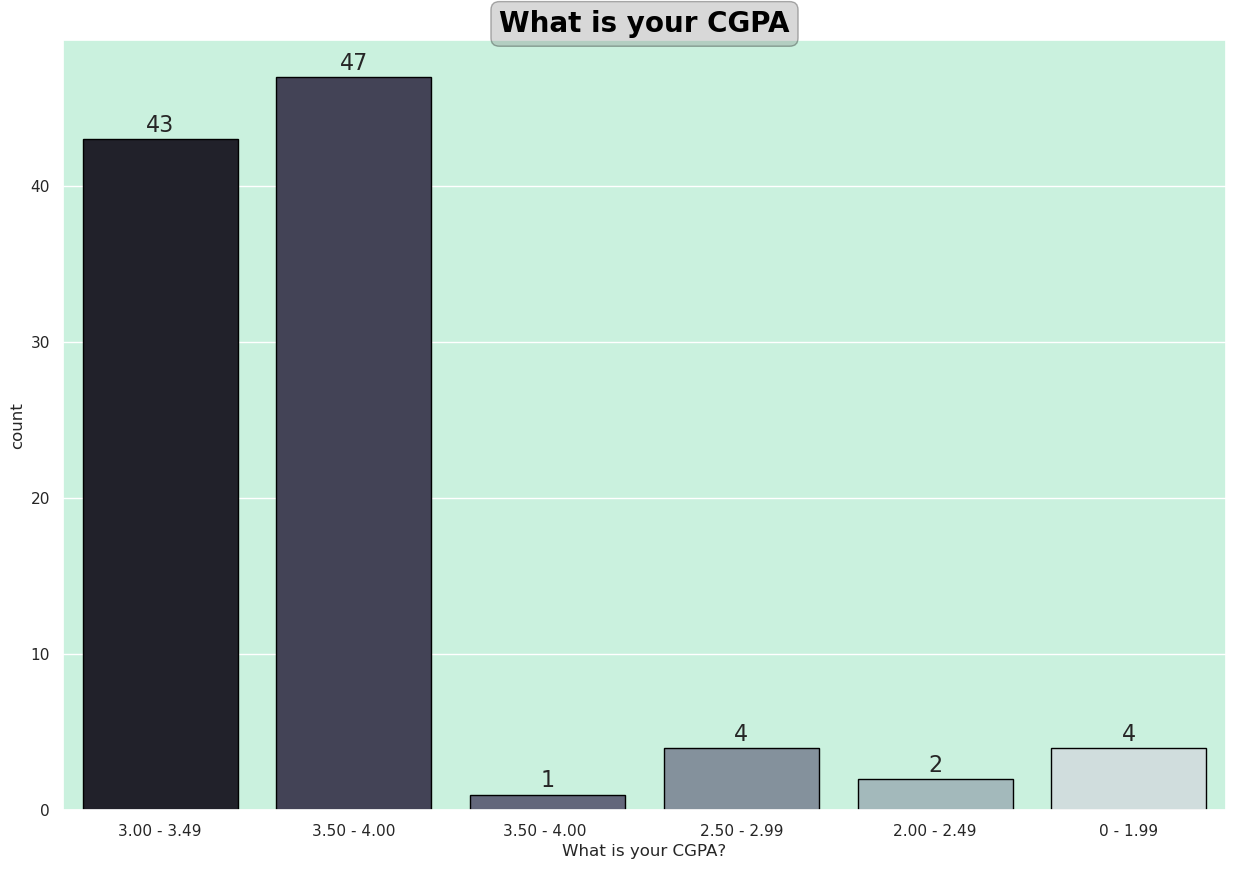

In [25]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x="What is your CGPA?",edgecolor="black",data=df,palette="bone")
plt.title('What is your CGPA', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict(boxstyle='round', facecolor='grey', alpha=0.30,edgecolor='black'));
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=16,
                xytext = (0, 10),
                textcoords = 'offset points')

> ## ➡️ **3.50 - 4.00** was the cgpa which was got my maximum people

In [26]:
df.sample()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,month,day,year,hour
35,2020-08-07 14:43:00,Female,18,Engineering,year 1,2.00 - 2.49,No,No,No,No,No,August,Friday,2020,14


No     85
Yes    16
Name: Marital status, dtype: int64


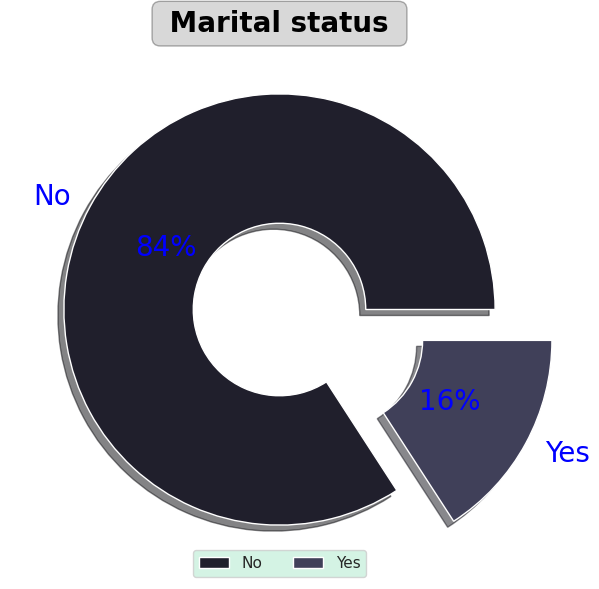

In [40]:
# what were the student marital status
x=df["Marital status"].value_counts().sort_values(ascending=False)
print(x)
plt.figure(figsize=(7,7))
color=sns.color_palette("bone")
plt.pie(x,labels=x.index,autopct="%0.0f%%",textprops={'color': 'blue',"fontsize":20},wedgeprops={"width":0.6},shadow=True,colors=color,explode=[0,0.3])
plt.legend(loc="lower center",bbox_to_anchor=(0.5,-0.01),ncol=4)
plt.title(' Marital status ', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict(boxstyle='round', facecolor='grey', alpha=0.30,edgecolor='black'));

> ## ➡️ Mostly people were **not married** in this dataset

No     66
Yes    35
Name: Do you have Depression?, dtype: int64


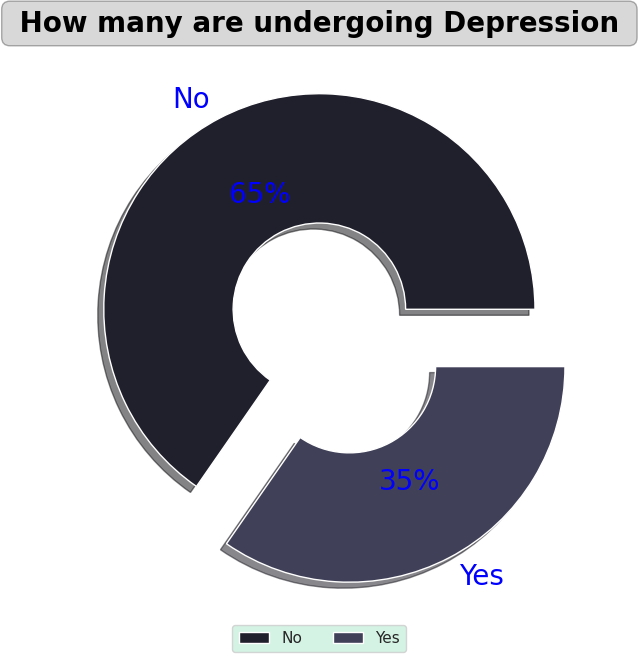

In [42]:
# How many are undergoing Depression
x=df["Do you have Depression?"].value_counts().sort_values(ascending=False)
print(x)
plt.figure(figsize=(7,7))
color=sns.color_palette("bone")
plt.pie(x,labels=x.index,autopct="%0.0f%%",textprops={'color': 'blue',"fontsize":20},wedgeprops={"width":0.6},shadow=True,colors=color,explode=[0,0.3])
plt.legend(loc="lower center",bbox_to_anchor=(0.5,-0.15),ncol=4)
plt.title(' How many are undergoing Depression ', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict(boxstyle='round', facecolor='grey', alpha=0.30,edgecolor='black'));

> ## ➡️ Only **35%** students say they are **undergoing Depression**

No     67
Yes    34
Name: Do you have Anxiety?, dtype: int64


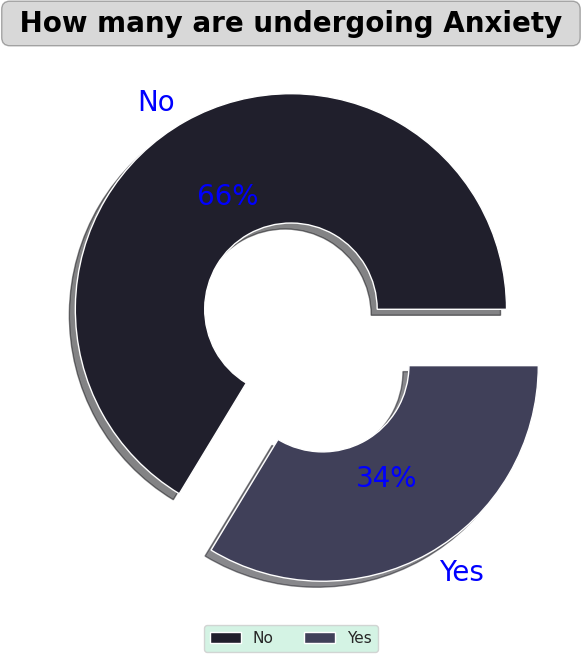

In [43]:
# How many are undergoing Anxiety
x=df["Do you have Anxiety?"].value_counts().sort_values(ascending=False)
print(x)
plt.figure(figsize=(7,7))
color=sns.color_palette("bone")
plt.pie(x,labels=x.index,autopct="%0.0f%%",textprops={'color': 'blue',"fontsize":20},wedgeprops={"width":0.6},shadow=True,colors=color,explode=[0,0.3])
plt.legend(loc="lower center",bbox_to_anchor=(0.5,-0.15),ncol=4)
plt.title(' How many are undergoing Anxiety ', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict(boxstyle='round', facecolor='grey', alpha=0.30,edgecolor='black'));

> ## ➡️ Only **34%** students say they are **undergoing Anxiety**

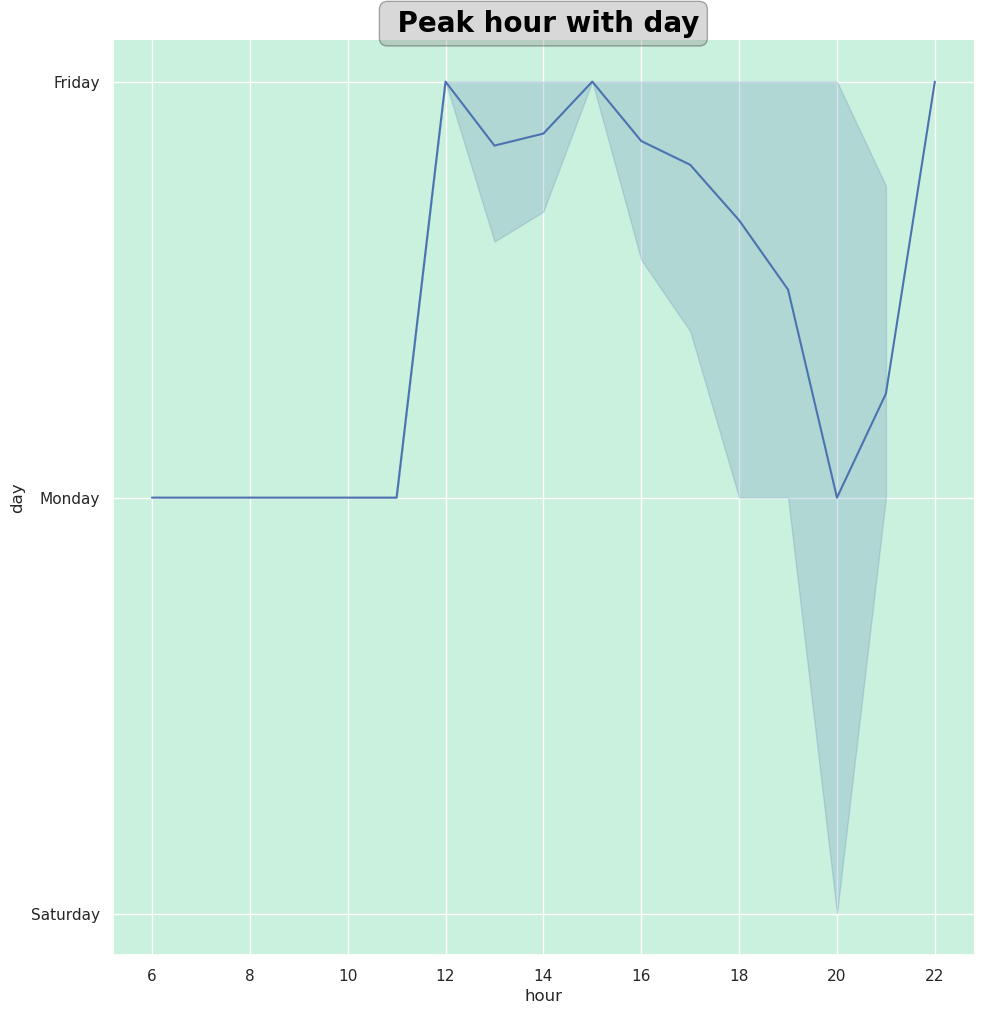

In [127]:
sns.relplot(x="hour",y="day",data=df,kind="line",height=10)
plt.title(' Peak hour with day', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict(boxstyle='round', facecolor='grey', alpha=0.30,edgecolor='black'));

> ## ➡️ Friday between **12 to 16** was the peak hour 

No     68
Yes    33
Name: Do you have Panic attack?, dtype: int64


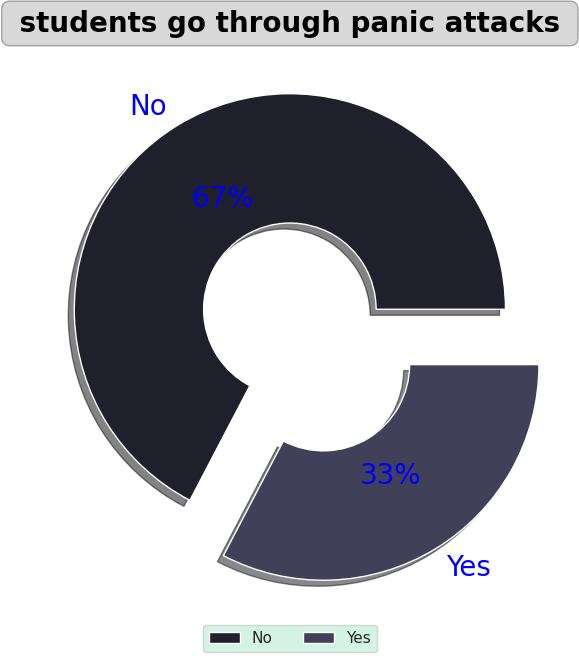

In [65]:
# how many students go through panic attacks
x=df["Do you have Panic attack?"].value_counts().sort_values(ascending=False)
print(x)
plt.figure(figsize=(7,7))
color=sns.color_palette("bone")
plt.pie(x,labels=x.index,autopct="%0.0f%%",textprops={'color': 'blue',"fontsize":20},wedgeprops={"width":0.6},shadow=True,colors=color,explode=[0,0.3])
plt.legend(loc="lower center",bbox_to_anchor=(0.5,-0.15),ncol=4)
plt.title(' students go through panic attacks ', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict(boxstyle='round', facecolor='grey', alpha=0.30,edgecolor='black'));

> ## ➡️ **33%** of the studenst out of 100 says the go through **panic attacks**

No     95
Yes     6
Name: Did you seek any specialist for a treatment?, dtype: int64


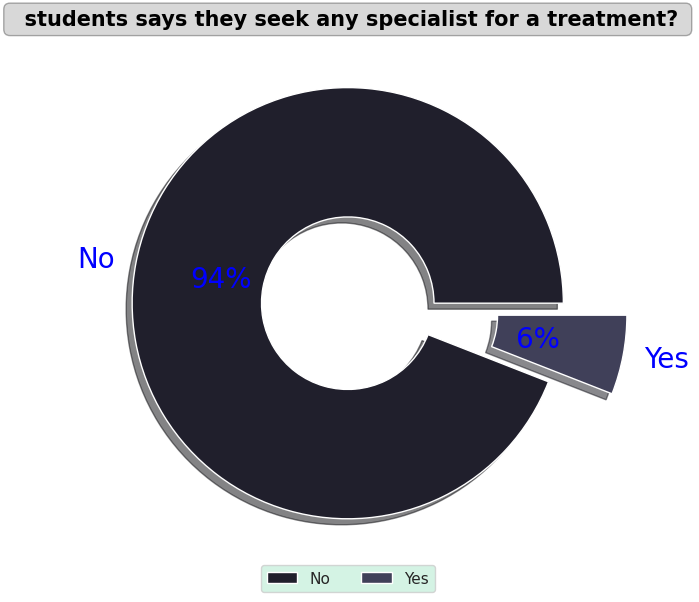

In [128]:
# how many students says they seek any specialist for a treatment?
x=df["Did you seek any specialist for a treatment?"].value_counts().sort_values(ascending=False)
print(x)
plt.figure(figsize=(7,7))
color=sns.color_palette("bone")
plt.pie(x,labels=x.index,autopct="%0.0f%%",textprops={'color': 'blue',"fontsize":20},wedgeprops={"width":0.6},shadow=True,colors=color,explode=[0,0.3])
plt.legend(loc="lower center",bbox_to_anchor=(0.5,-0.05),ncol=4)
plt.title('  students says they seek any specialist for a treatment? ', fontdict={'fontsize': 15, 'color': 'black', 'fontweight': 'bold'}, bbox=dict(boxstyle='round', facecolor='grey', alpha=0.30,edgecolor='black'));

> ## ➡️ Only **6%** of the students says they seek any specialist for a treatment

August       73
July         23
September     5
Name: month, dtype: int64


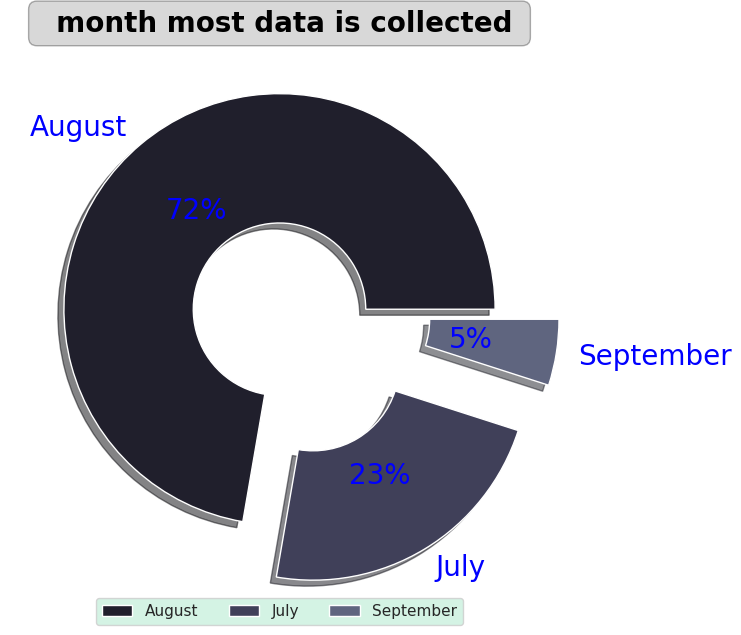

In [75]:
# In which month most data is collected
x=df["month"].value_counts().sort_values(ascending=False)
print(x)
plt.figure(figsize=(7,7))
color=sns.color_palette("bone")
plt.pie(x,labels=x.index,autopct="%0.0f%%",textprops={'color': 'blue',"fontsize":20},wedgeprops={"width":0.6},shadow=True,colors=color,explode=[0,0.3,0.3])
plt.legend(loc="lower center",bbox_to_anchor=(0.5,-0.1),ncol=4)
plt.title('  month most data is collected ', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict(boxstyle='round', facecolor='grey', alpha=0.30,edgecolor='black'));

> ## ➡️ Mostly data is collected in **August month**

In [81]:
df.sample()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,month,day,year,hour
22,2020-08-07 13:13:00,Female,24,BCS,year 1,3.50 - 4.00,No,No,No,No,No,August,Friday,2020,13


In [80]:
# People who are undergoing depression, Anxiety, panic attacks and seeking treatment 
df.loc[(df["Do you have Depression?"]=="Yes") & (df["Do you have Anxiety?"]=="Yes") & (df["Do you have Panic attack?"]=="Yes") & (df["Did you seek any specialist for a treatment?"]=="Yes")]

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,month,day,year,hour
28,2020-08-07 13:58:00,Female,24,BIT,Year 3,3.50 - 4.00,Yes,Yes,Yes,Yes,Yes,August,Friday,2020,13


> ## ➡️ There is only **one female which is 24 years old** who is undergoing depression,Anxiety, panic attacks and seeking treatment

In [113]:
# People who are undergoing depression, Anxiety, panic attacks and seeking treatment where from which course
df.loc[(df["Do you have Depression?"]=="Yes") | (df["Do you have Anxiety?"]=="Yes") | (df["Do you have Panic attack?"]=="Yes") | (df["Did you seek any specialist for a treatment?"]=="Yes")]["What is your course?"].value_counts().sort_values(ascending=False).to_frame().head(10).style.background_gradient(cmap="copper")

,What is your course?
Engineering,11
BCS,11
BIT,9
KOE,3
psychology,2
BENL,2
Laws,2
ALA,1
IT,1
Islamic education,1


> ## ➡️ Mostly Students who are undergoing depression or Anxiety or panic attacks or seeking treatments were from the **Engineering, Bcs and BIT Courses**

Female    48
Male      16
Name: Choose your gender, dtype: int64


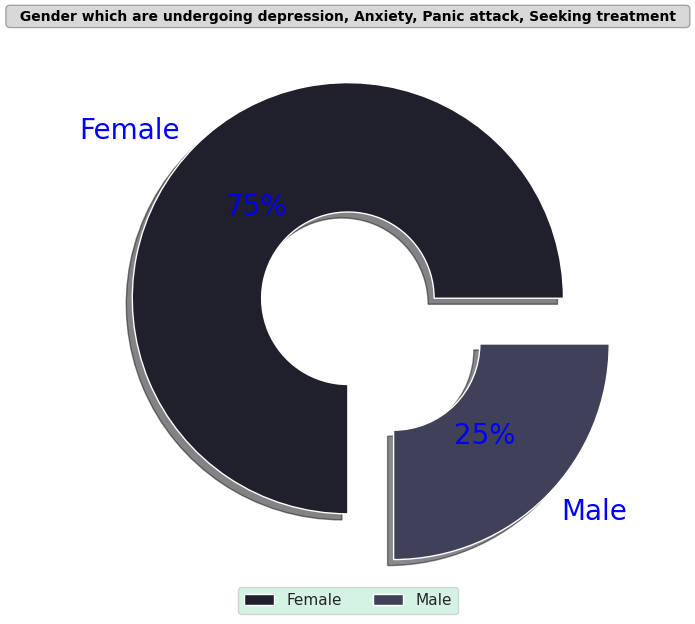

In [112]:
# People who are undergoing depression, Anxiety, panic attacks and seeking treatment where males or females
x = df.loc[(df["Do you have Depression?"]=="Yes") | (df["Do you have Anxiety?"]=="Yes") | (df["Do you have Panic attack?"]=="Yes") | (df["Did you seek any specialist for a treatment?"]=="Yes")]["Choose your gender"].value_counts().sort_values(ascending=False)
print(x)
plt.figure(figsize=(7,7))
color=sns.color_palette("bone")
plt.pie(x,labels=x.index,autopct="%0.0f%%",textprops={'color': 'blue',"fontsize":20},wedgeprops={"width":0.6},shadow=True,colors=color,explode=[0,0.3])
plt.legend(loc="lower center",bbox_to_anchor=(0.5,-0.1),ncol=4)
plt.title('  Gender which are undergoing depression, Anxiety, Panic attack, Seeking treatment  ', fontdict={'fontsize': 10, 'color': 'black', 'fontweight': 'bold'}, bbox=dict(boxstyle='round', facecolor='grey', alpha=0.30,edgecolor='black'));

> ## ➡️ Mostly Students who are undergoing depression or Anxiety or panic attacks or seeking treatments were **Females**

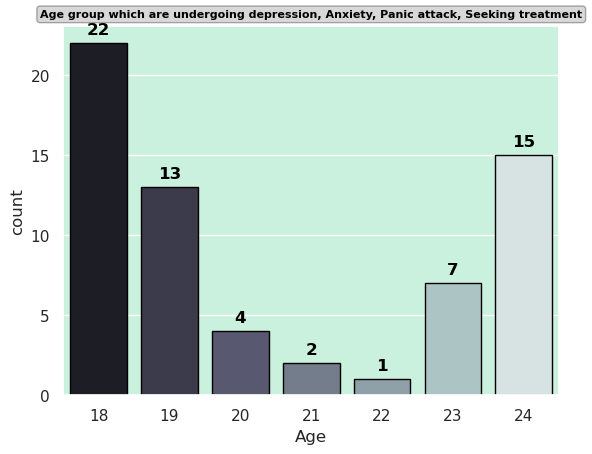

In [143]:
# People who are undergoing depression, Anxiety, panic attacks and seeking treatment of which age 
x=df.loc[(df["Do you have Depression?"]=="Yes") | (df["Do you have Anxiety?"]=="Yes") | (df["Do you have Panic attack?"]=="Yes") | (df["Did you seek any specialist for a treatment?"]=="Yes")]
ax=sns.countplot(x="Age",edgecolor="black",data=x,palette="bone")
plt.title('Age group which are undergoing depression, Anxiety, Panic attack, Seeking treatment', fontdict={'fontsize': 8, 'color': 'black', 'fontweight': 'bold'}, bbox=dict(boxstyle='round', facecolor='grey', alpha=0.30,edgecolor='black'));
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=12 ,color='black',fontweight= 'bold',
                xytext = (0,10),
                textcoords = 'offset points')

> ## ➡️ The **Age of 18** were most who are undergoing depression or Anxiety or panic attacks or seeking treatments 

In [124]:
# People who are undergoing depression, Anxiety, panic attacks and seeking treatment are from which year of study
df.loc[(df["Do you have Depression?"]=="Yes") | (df["Do you have Anxiety?"]=="Yes") | (df["Do you have Panic attack?"]=="Yes") | (df["Did you seek any specialist for a treatment?"]=="Yes")]["Your current year of Study"].value_counts().sort_values(ascending=False).to_frame().head(10).style.background_gradient(cmap="copper")

,Your current year of Study
year 1,23
Year 3,15
Year 2,11
year 2,8
year 3,3
Year 1,2
year 4,2


> ## ➡️ The **Year 1 students** were most who are undergoing depression or Anxiety or panic attacks or seeking treatments

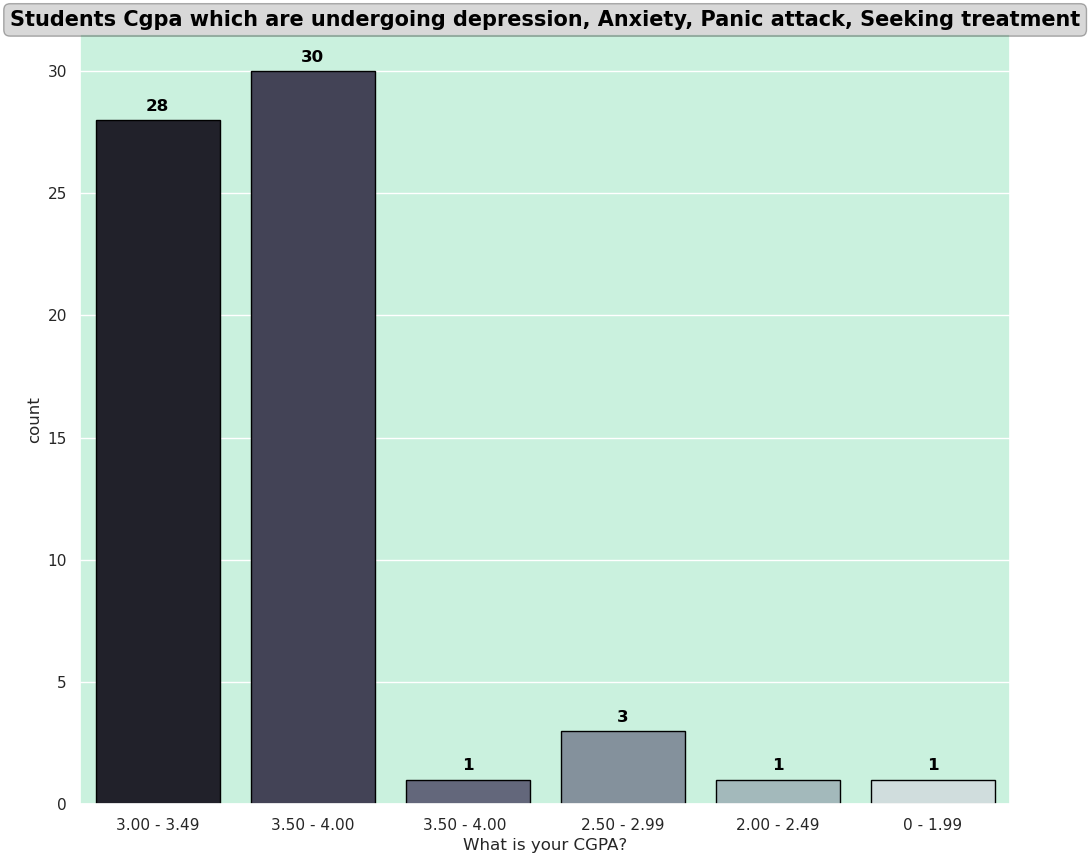

In [142]:
# People who are undergoing depression, Anxiety, panic attacks and seeking treatment contains which cgpa
x = df.loc[(df["Do you have Depression?"]=="Yes") | (df["Do you have Anxiety?"]=="Yes") | (df["Do you have Panic attack?"]=="Yes") | (df["Did you seek any specialist for a treatment?"]=="Yes")]
plt.figure(figsize=(12,10))
ax=sns.countplot(x="What is your CGPA?",edgecolor="black",data=x,palette="bone")
plt.title('Students Cgpa which are undergoing depression, Anxiety, Panic attack, Seeking treatment', fontdict={'fontsize': 15, 'color': 'black', 'fontweight': 'bold'}, bbox=dict(boxstyle='round', facecolor='grey', alpha=0.30,edgecolor='black'));
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=12 ,color='black',fontweight= 'bold',
                xytext = (0,10),
                textcoords = 'offset points')

> ## ➡️ The **students Cgpa were 3.50 - 4.00** who are undergoing depression or Anxiety or panic attacks or seeking treatments

No     48
Yes    16
Name: Marital status, dtype: int64


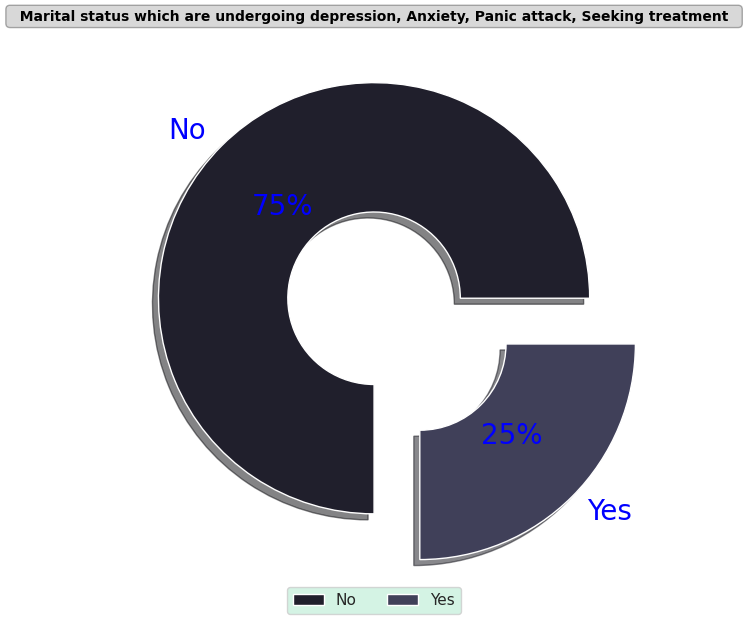

In [144]:
# People who are undergoing depression, Anxiety, panic attacks and seeking treatment where males or females
x = df.loc[(df["Do you have Depression?"]=="Yes") | (df["Do you have Anxiety?"]=="Yes") | (df["Do you have Panic attack?"]=="Yes") | (df["Did you seek any specialist for a treatment?"]=="Yes")]["Marital status"].value_counts().sort_values(ascending=False)
print(x)
plt.figure(figsize=(7,7))
color=sns.color_palette("bone")
plt.pie(x,labels=x.index,autopct="%0.0f%%",textprops={'color': 'blue',"fontsize":20},wedgeprops={"width":0.6},shadow=True,colors=color,explode=[0,0.3])
plt.legend(loc="lower center",bbox_to_anchor=(0.5,-0.1),ncol=4)
plt.title('  Marital status which are undergoing depression, Anxiety, Panic attack, Seeking treatment  ', fontdict={'fontsize': 10, 'color': 'black', 'fontweight': 'bold'}, bbox=dict(boxstyle='round', facecolor='grey', alpha=0.30,edgecolor='black'));

> ## ➡️ The students who are undergoing depression or Anxiety or panic attacks or seeking treatments were **mostly unmarried only 25% were married**

<h1 style="text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;">Analysis Finished </h1>


<h1 style="color: red; text-align:center; padding: 10px; font-family:cursive; font-size: 48px;">If You Like it please do upvote📌 & Comment💬</h1>